In [97]:
import pickle
import pandas as pd
from sklearn.metrics import log_loss, auc, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
from sklearn.metrics import classification_report
%matplotlib inline

In [12]:
with open('Finish_model.pkl', 'rb') as handle:
    b = pickle.load(handle)

In [125]:
data = [34, 88.39, 3, 0, 1, 1, 2.5, 0.7174, 0.6806, 23.0, 0.90, 1]

In [126]:
probabilities = b.predict_proba(data)

/Users/stef/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [128]:
probabilities[0][1]

0.84210408936773429

In [142]:
with open('DNS_model.pkl', 'rb') as handle:
    c = pickle.load(handle)

In [143]:
data2 = [34, 76.27, 2, 1, 1, 1, 4.1, 0.7972, 0.6689, 34.0, 0.94, 32, 1]

In [144]:
probability = c.predict_proba(data2)

/Users/stef/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [146]:
probability[0][1] * 100.

0.5210273844786264

In [17]:
with open('y_test.pkl', 'rb') as handle:
    y_test = pickle.load(handle)

In [18]:
with open('X_test.pkl', 'rb') as handle:
    X_test = pickle.load(handle)

In [19]:
test_proba = c.predict_proba(X_test)

In [20]:
print log_loss(y_test, test_proba)
print roc_auc_score(y_test, test_proba[:,1])

0.19540495509
0.691496199947


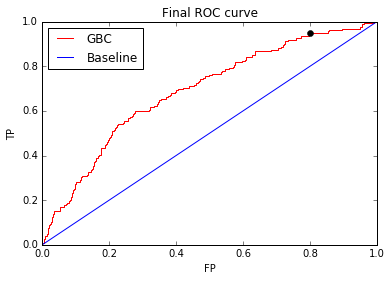

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1]) 
labels = ['fpr', 'tpr']
plt.ylabel('TP')
plt.xlabel('FP')
plt.title('Final ROC curve')
plt.plot(fpr, tpr, 'r')
X = [0, 1]
y = [0, 1]
plt.plot(X, y, 'b')
plt.plot(0.798597, 0.949685, 'ko')
plt.legend(['GBC', 'Baseline'], loc=2)

In [22]:
test2 = c.predict(X_test)
print confusion_matrix(y_test, test2)
print accuracy_score(y_test, test2)

[[2992    2]
 [ 158    1]]
0.949254678084


In [171]:
3015 + 1 + 2 + 135

3153

In [23]:
y_test.value_counts()

0    2994
1     159
Name: status_coded, dtype: int64

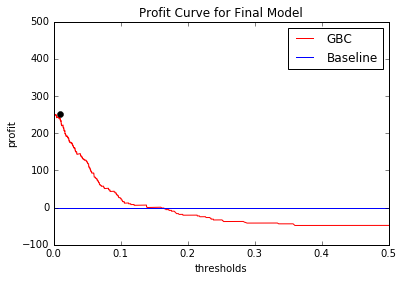

In [134]:
TPC = 250.
FPC = 0
FNC = -100.
TNC = 50
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
cost = (tpr * TPC) + ((1 - fpr) * TNC) + (fpr * FPC) + ((1 - tpr) * FNC)
GBcost = plt.plot(thresholds, cost, 'r', label='Gradient Boosted Classifier')
plt.axhline(0, color='b')
plt.ylabel('profit')
plt.xlabel('thresholds')
plt.title('Profit Curve for Final Model')
plt.axis([0, 0.5, -100, 500])
plt.legend(['GBC', 'Baseline'], loc=1)
plt.plot(0.00903, 252.53, 'ko')
plt.show()

In [198]:
json_request = [{"name":"age","value":"34"},{"name":"gender","value":"Female"},{"name":"race","value":"Bear 100"}]

In [201]:
request_df = pd.DataFrame(json_request)

In [206]:
request_df['value'][2]

'Bear 100'

In [121]:
thresholds[282]

0.0090343172340295267

In [120]:
cost[282]

252.53021766804051

In [117]:
tpr[282]

0.94968553459119498

In [118]:
fpr[282]

0.79859719438877752

In [78]:
thresholds[174]

0.039634140436437697

In [90]:
##Load Brazos Bend 100 data for model check
cvdata = pd.read_csv('../ult_sign_scrape/race_master/BB2015.csv')

In [91]:
##Clean BB100
bb100 = cvdata.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
bbgender_dummies = pd.get_dummies(bb100.gender, prefix='gender')
bb100 = bb100.join(bbgender_dummies)

def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

##BB100 CV data:
bb100["status_coded"] = coding(bb100["status"], {'1':0,'2':0, '3':1})
bb100['DNF_DNS_coded'] = coding(bb100["status"], {'1':1,'2':0, '3':0})
bb100_coded = bb100.drop(['status'], axis=1)

In [92]:
##Set cross validation response for BB100
y_BB100 = bb100_coded.pop('DNF_DNS_coded')
##Set predictors for BB100 cross validation
BB100X = bb100_coded.drop(['gender', 'participant_id', 'race_name', 'race_id'\
                 , 'gender_M'], axis=1)

In [93]:
bbprob = c.predict_proba(BB100X)

In [94]:
auc = roc_auc_score(y_BB100, bbprob[:,1])

In [95]:
auc

0.68612836438923397

In [101]:
bbprob2 = c.predict(BB100X)
print confusion_matrix(y_BB100, bbprob2)
print accuracy_score(y_BB100, bbprob2)

[[69  0]
 [35  0]]
0.663461538462


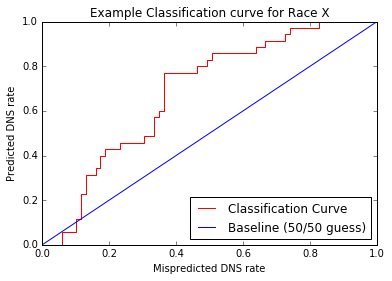

In [140]:
fpr, tpr, thresholds = roc_curve(y_BB100, bbprob[:,1]) 
labels = ['fpr', 'tpr']
plt.ylabel('Predicted DNS rate')
plt.xlabel('Mispredicted DNS rate')
plt.title('Example Classification curve for Race X')
plt.plot(fpr, tpr, 'r')
X = [0, 1]
y = [0, 1]
plt.plot(X, y, 'b')
plt.legend(['Classification Curve', 'Baseline (50/50 guess)'], loc=4)

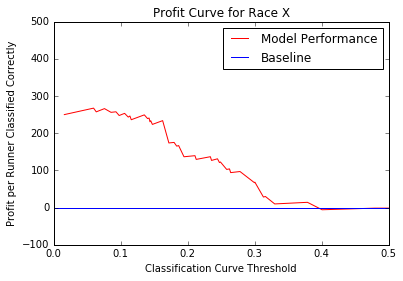

In [141]:
TPC = 250. ##additional race entry sold
FPC = 0 ##already bought supplies
FNC = -100. ##cost of supplies
TNC = 100. ##satisified customer, will oftentimes get friend involved next year
fpr, tpr, thresholds = roc_curve(y_BB100, bbprob[:,1])
cost = (tpr * TPC) + ((1 - fpr) * TNC) + (fpr * FPC) + ((1 - tpr) * FNC)
GBcost = plt.plot(thresholds, cost, 'r', label='Gradient Boosted Classifier')
plt.axhline(0, color='b')
plt.ylabel('Profit per Runner Classified Correctly')
plt.xlabel('Classification Curve Threshold')
plt.title('Profit Curve for Race X')
plt.axis([0, 0.5, -100, 500])
plt.legend(['Model Performance', 'Baseline'], loc=1)

plt.show()

In [114]:
cost[41]

267.39130434782606